# Trajectories Visualization

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from trackml.dataset import load_event
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")

In [2]:
path2data = '/home/alepfu/Desktop/dataset/train_100_events/'
event_id = 'event000001000'
hits, cells, particles, truth = load_event(path2data + event_id)

hits_truth = pd.merge(truth, pd.DataFrame(hits), on = ['hit_id']).loc[:,["hit_id", "particle_id", "x", "y", "z"]]

hits_truth['r'] = hits_truth.apply(lambda hit: np.sqrt(hit['x']**2 + hit['y']**2), axis=1)

hits_truth.head(1)

,hit_id,particle_id,x,y,z,r
0,1,0,-64.409897,-7.1637,-1502.5,64.807048


In [40]:
N_sample_tracks = 5
sample_hits = hits_truth.loc[hits_truth['particle_id'].isin(random.sample(list(hits_truth['particle_id'].unique()), N_sample_tracks))].copy()
sample_hits.shape

(50, 6)

### XY, XZ and YZ Trajectories

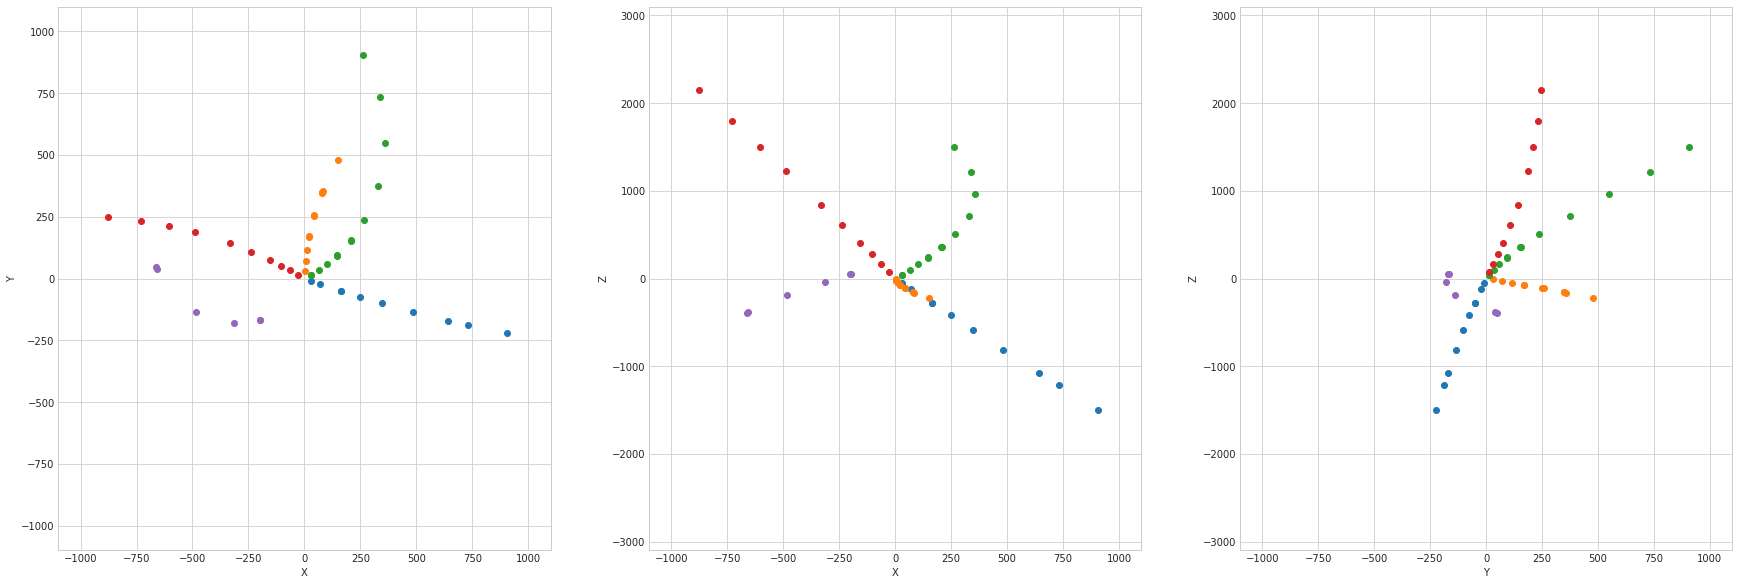

In [41]:

fig = plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
for particle_id in sample_hits['particle_id'].unique():
    track = sample_hits[sample_hits['particle_id'] == particle_id]
    plt.plot(track['x'], track['y'], 'o')
plt.xlim((-1100,1100))
plt.ylim((-1100,1100))
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1,3,2)
for particle_id in sample_hits['particle_id'].unique():
    track = sample_hits[sample_hits['particle_id'] == particle_id]
    plt.plot(track['x'], track['z'], 'o')
plt.xlim((-1100,1100))
plt.ylim((-3100,3100))
plt.xlabel("X")
plt.ylabel("Z")

plt.subplot(1,3,3)
for particle_id in sample_hits['particle_id'].unique():
    track = sample_hits[sample_hits['particle_id'] == particle_id]
    plt.plot(track['y'], track['z'], 'o')
plt.xlim((-1100,1100))
plt.ylim((-3100,3100))
plt.xlabel("Y")
plt.ylabel("Z")

plt.show()

### ZR Trajectories

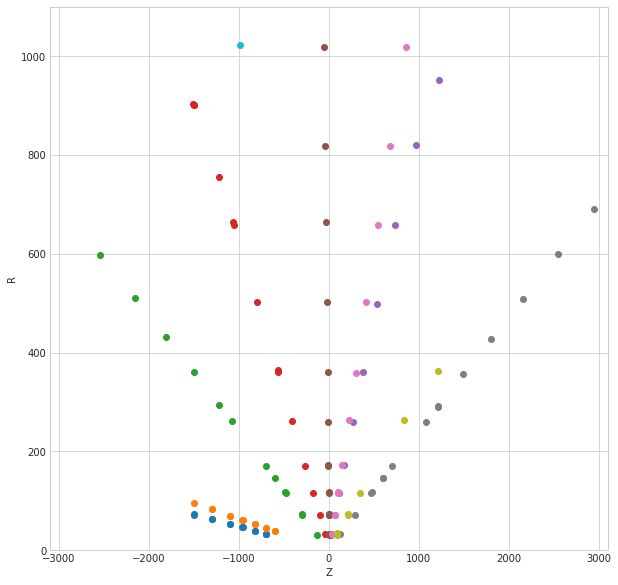

In [19]:
fig = plt.figure(figsize=(10,10))

for particle_id in sample_hits['particle_id'].unique():
    track = sample_hits[sample_hits['particle_id'] == particle_id]
    plt.plot(track['z'], track['r'], 'o')
plt.xlim((-3100,3100))
plt.ylim((0,1100))
plt.xlabel("Z")
plt.ylabel("R")

plt.show()

### XYZ Trajectories

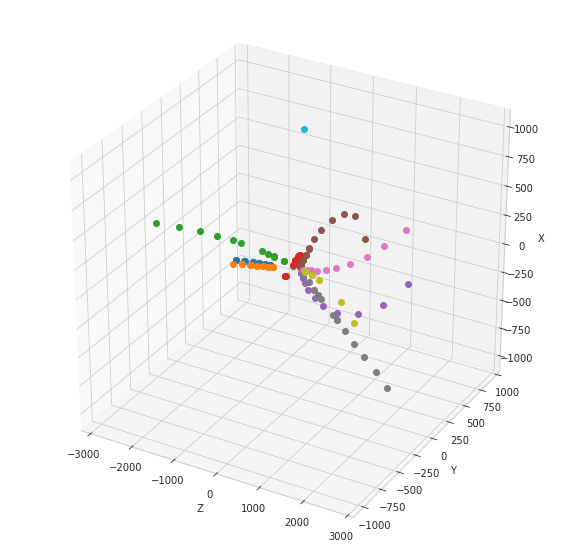

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for particle_id in sample_hits['particle_id'].unique():
    track = sample_hits[sample_hits['particle_id'] == particle_id]
    plt.plot(track['z'], track['y'], track['z'], 'o')

ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_zlabel('X')
ax.set_xlim3d(-3100,3000)
ax.set_ylim3d(-1100,1000)
ax.set_zlim3d(-1100,1100)
plt.show()

### Low and high momentum tracjetories

In [39]:
%matplotlib inline

N_viz = 10
merge = pd.merge(pd.merge(truth, pd.DataFrame(hits), on = ['hit_id']), pd.DataFrame(particles), on = ['particle_id'])
merge = merge.loc[:, ["hit_id", "particle_id", "pz", "x", "y", "z"]]
group = merge.groupby(['particle_id']).agg({'pz':'mean'}).reset_index()
sort = group.sort_values('pz')
subset = pd.concat([sort.head(N_viz), sort.tail(N_viz)])
subset.head(1)

,particle_id,pz
290,4545862105563136,-95.573402


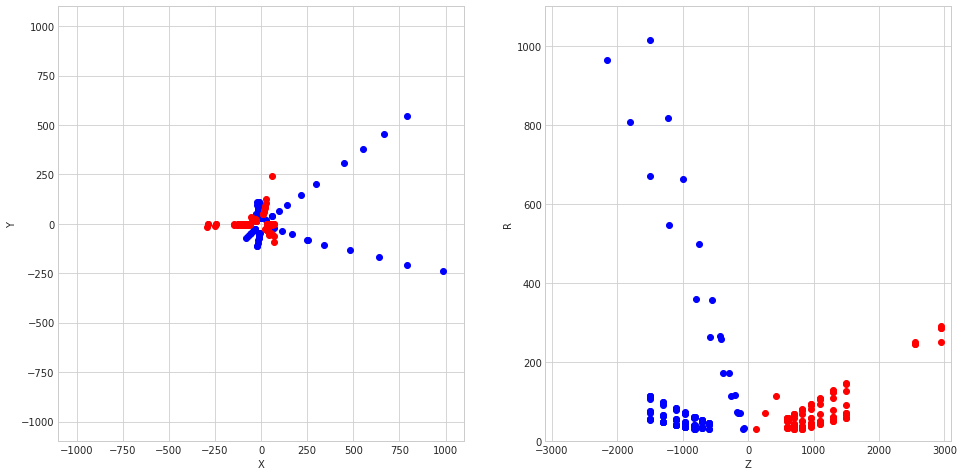

In [38]:
fig = plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
for index, item in subset.iterrows():
    p = hits_truth.loc[hits_truth['particle_id'].isin([item['particle_id']])]
    if item['pz'] > 0:
        plt.plot(p.x, p.y, "o", color='r')
    else:
        plt.plot(p.x, p.y, "o", color='b')
plt.xlim((-1100,1100))
plt.ylim((-1100,1100))
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1,2,2)
for index, item in subset.iterrows():
    p = hits_truth.loc[hits_truth['particle_id'].isin([item['particle_id']])]
    if item['pz'] > 0:
        plt.plot(p.z, p.r, "o", color='r')
    else:
        plt.plot(p.z, p.r, "o", color='b')
plt.xlim((-3100,3100))
plt.ylim((0,1100))
plt.xlabel("Z")
plt.ylabel("R")
plt.show()